In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  transforms
import seaborn as sns
%matplotlib inline
plt.style.use('default')
import warnings
warnings.filterwarnings('ignore')

names  = !ls all_re_filtered_lensort_OTU_id*.uc
names = names[1:-1] #+ ["all_re_filtered_lensort_OTU_id100.uc"]
names

['all_re_filtered_lensort_OTU_id91.uc',
 'all_re_filtered_lensort_OTU_id92.uc',
 'all_re_filtered_lensort_OTU_id93.uc',
 'all_re_filtered_lensort_OTU_id94.uc',
 'all_re_filtered_lensort_OTU_id95.uc',
 'all_re_filtered_lensort_OTU_id96.uc',
 'all_re_filtered_lensort_OTU_id97.uc',
 'all_re_filtered_lensort_OTU_id98.uc']

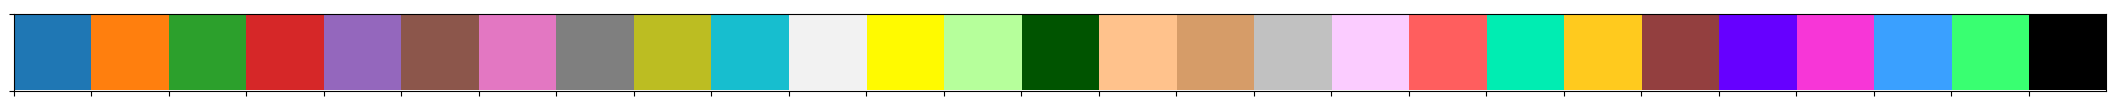

In [270]:
my_colors = [u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf',
 u'#f2f2f2',            
 u'#fffa00',
 u'#b6ff9b',
 u'#005400',
 u'#ffc28c',
 u'#d69c68',
 u'#c1c1c1',
 u'#fbccff',
 u'#ff5e5e',
 u'#00edb2',
 u'#ffca1e',
 u'#933f3f',
 u'#6600ff',
 u'#f736d7',
 u'#3aa0ff',
 u'#39ff71',
 u'#000000']

sns.palplot(my_colors)

In [2]:
def tax_genus(pwd):
    tax1 = pd.read_csv(pwd,header=None,sep="\t",index_col=0)
    tax1 = pd.DataFrame(tax1.loc[:,1])
    tax1 = tax1[1].str.split(",",expand=True)
    for i in list(tax1.columns):
        tax1[i] = tax1[i].replace(".+unidentified.+",np.nan,regex=True)
    #tax1[tax1[5] == "None"]
    #tax1[tax1[5].isnull()]
    tax1["taxon"] = ""
    for i in tax1.columns[:-2]:
        add_tax = ~tax1.iloc[:,i].isnull()
        tax1.iloc[:,-1][add_tax] = tax1[add_tax].iloc[:,i]
        tax2 = pd.DataFrame(tax1.iloc[:,-1].str.split("(",expand=True)[0])
        tax2.columns = ["taxon"]
    return tax2
#tax_tem = tax_genus("all_re_filtered_lensort_OTU_id97_sintax_rm.txt")#.info()#.head()

'usearch_OTU_id97_count.txt'

In [280]:
pwd = 'all_re_filtered_lensort_OTU_id97.uc'

def convert_to_pivot_tax(pwd):
    ## convert the usearch result to pivot table
    df = pd.read_csv(pwd,header=None,sep="\t")
    df1 = df[df[0]=="H"]
    df1[10] = df1[8].str.split("-",expand=True)[0]
    df2 = df1.pivot_table(index=9,columns=10,values=8,aggfunc='count')
    df2.index.name = "#OTU_ID"
    df2.columns.name = ""

    ## read 1st tax file
    pwd_tax_1 = pwd.replace(".uc","_sintax_rm.txt")
    tax_tem_1 = tax_genus(pwd_tax_1)#.info()#.head()
    merged_1 = pd.merge(df2,tax_tem_1,left_index=True,right_index=True,how="left")
    ## read 2nd tax file
    pwd_tax_2 = pwd.replace(".uc","_sintax_rm_unidentifiedG.txt")
    tax_tem_2 = tax_genus(pwd_tax_2)#.info()#.head()
    merged_2 = pd.merge(merged_1,tax_tem_2,left_index=True,right_index=True,how="left")

    ## rename columns
    col = list(merged_2.columns)
    col[-2:] = ['taxon_unite','taxon_unite_rmUg']
    merged_2.columns = col
    return merged_2

## save to csv files
# for each in names:
#     convert_to_pivot_tax(pwd).to_csv(each.replace("all_re_filtered_lensort","usearch").replace(".uc","_count.txt"))

## plot # of sequences total for each sample

/global/common/cori/software/python/3.6-anaconda-5.2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


% of samples > 100 seqs: 51.14%
% of samples > 500 seqs: 35.23%
% of samples > 1000 seqs: 32.95%


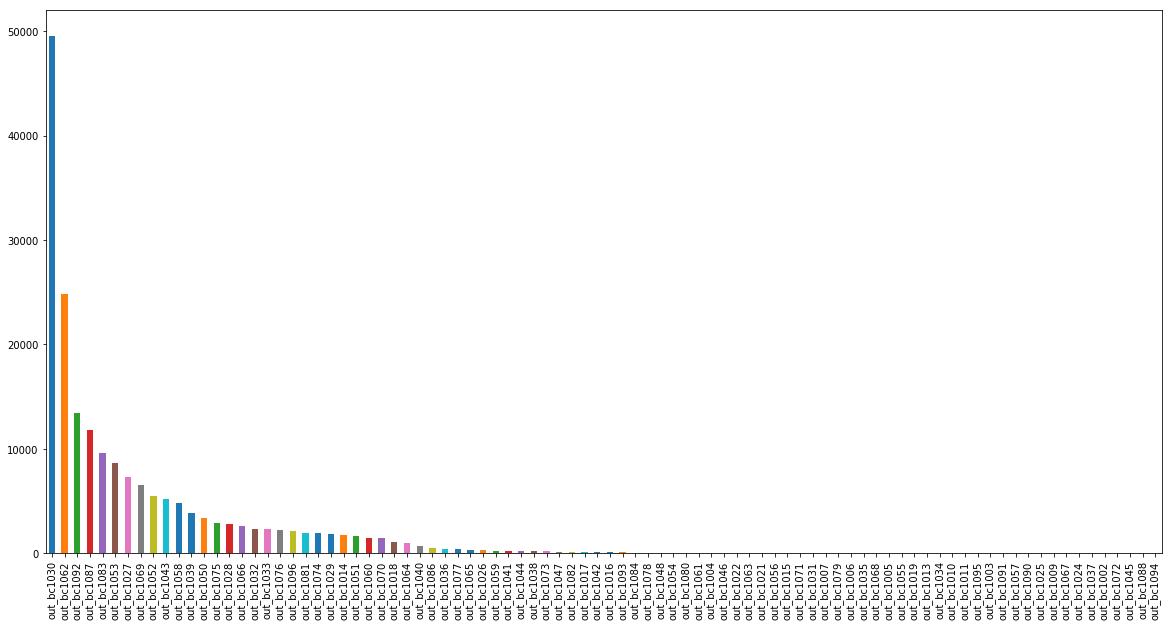

In [57]:
count_tax_id97 = convert_to_pivot_tax(pwd)
plt.figure(figsize=(20,10))
count_tax_id97.iloc[:,:-2].sum().sort_values(ascending=False).plot(kind="bar")
#plt.ylim(0,500)

def print_per_otu(df,i):
    tem = df.iloc[:,:-2].sum(0)
    num = np.mean(tem > i)*100
    print("% of samples > " + str(i) + " seqs: {0:.2f}%".format(num))
    return tem[tem > i].index

idx_id97_100 = print_per_otu(count_tax_id97,100)
idx_id97_500 = print_per_otu(count_tax_id97,500)
idx_id97_1000 = print_per_otu(count_tax_id97,1000)

In [260]:
# cut_off = 0.01

# count_tax_id97_500 = count_tax_id97[list(idx_id97_500)+ ['taxon_unite','taxon_unite_rmUg']]
# ## convet to percentage
# count_tax_id97_500.iloc[:,:-2] = (count_tax_id97_500.iloc[:,:-2] / count_tax_id97_500.iloc[:,:-2].sum())
# ## replace values < cutoff with 0
# count_tax_id97_500.iloc[:,:-2] = count_tax_id97_500.iloc[:,:-2].where(count_tax_id97_500.iloc[:,:-2] > cut_off, 0)

# ## remove all 0 in the row
# count_tax_id97_500_filter = count_tax_id97_500.loc[count_tax_id97_500.iloc[:,:-2].sum(1) > 0]
# len(count_tax_id97_500_filter['taxon_unite_rmUg'].unique())

In [261]:
# len(count_tax_id97_500_filter)

In [262]:
# count_tax_id97_500_filter_sorted = count_tax_id97_500_filter.sort_values("taxon_unite_rmUg")
# count_tax_id97_500_filter_sorted.iloc[:-2].sum()

In [263]:
# genus = list(count_tax_id97_500_filter_sorted['taxon_unite_rmUg'].unique())
# genus_color = pd.DataFrame(my_colors,genus)
# genus_color.columns = ['color']
# genus_color = pd.merge(count_tax_id97_500_filter_sorted.iloc[:,-2:],genus_color,left_on='taxon_unite_rmUg',right_index=True,how='left')

In [264]:
# idx_name = count_tax_id97_500_filter_sorted.reset_index()['#OTU_ID']+ "   " + count_tax_id97_500_filter_sorted.reset_index()['taxon_unite_rmUg']
# count_tax_id97_500_filter_sorted_plot = count_tax_id97_500_filter_sorted.copy()
# count_tax_id97_500_filter_sorted_plot.index = idx_name
# #count_tax_id97_500_filter_sorted_plot

In [265]:
# count_tax_id97_500_filter_sorted_plot.iloc[:,:-2].T.plot(kind='bar', width=0.8,stacked=True,colors=genus_color['color'],edgecolor='black',figsize=(20,10))
# #plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.,prop={'size': 8},ncol=2)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
#           fancybox=True, shadow=True, ncol=6,prop={'size': 10})

In [251]:
def convert_per_plot(pwd, cut_off_per, cut_off_abund):
    count_tax_id97 = convert_to_pivot_tax(pwd)
    idx_id97_500 = print_per_otu(count_tax_id97,500)
    count_tax_id97_500 = count_tax_id97[list(idx_id97_500)+ ['taxon_unite','taxon_unite_rmUg']]

    ## convet to percentage
    count_tax_id97_500.iloc[:,:-2] = (count_tax_id97_500.iloc[:,:-2] / count_tax_id97_500.iloc[:,:-2].sum())
    ## replace values < cutoff with 0
    count_tax_id97_500.iloc[:,:-2] = count_tax_id97_500.iloc[:,:-2].where(count_tax_id97_500.iloc[:,:-2] > cut_off, 0)

    ## remove all 0 in the row
    count_tax_id97_500_filter = count_tax_id97_500.loc[count_tax_id97_500.iloc[:,:-2].sum(1) > 0]

    ## sort based on taxon
    count_tax_id97_500_filter_sorted = count_tax_id97_500_filter.sort_values("taxon_unite_rmUg")

    ## add colors to each genus
    genus = list(count_tax_id97_500_filter_sorted['taxon_unite_rmUg'].unique())
    genus_color = pd.DataFrame(my_colors,genus)
    genus_color.columns = ['color']
    genus_color = pd.merge(count_tax_id97_500_filter_sorted.iloc[:,-2:],genus_color,left_on='taxon_unite_rmUg',right_index=True,how='left')

    ## organize a little bit
    idx_name = count_tax_id97_500_filter_sorted.reset_index()['#OTU_ID']+ "   " + count_tax_id97_500_filter_sorted.reset_index()['taxon_unite_rmUg']
    count_tax_id97_500_filter_sorted_plot = count_tax_id97_500_filter_sorted.copy()
    count_tax_id97_500_filter_sorted_plot.index = idx_name

    ## print total number of unique OTUs and genus after filtering using cutoff
    print("# of unique genus: " + str(len(count_tax_id97_500_filter['taxon_unite_rmUg'].unique())))
    print("# of OTUs: " + str(len(count_tax_id97_500_filter)))
    total_per_range = count_tax_id97_500_filter_sorted.iloc[:,:-2].sum()
    min_str = str(round(min(total_per_range)*100))
    max_str = str(round(max(total_per_range)*100))
    print("Range of total OTUs % after cutoff: "+min_str+"% to " + max_str + "%")

    ## plot
    count_tax_id97_500_filter_sorted_plot.iloc[:,:-2].T.plot(kind='bar', width=0.8,stacked=True,colors=genus_color['color'],edgecolor='black',figsize=(20,10))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=True, ncol=6,prop={'size': 10})
    plt.title(pwd.replace("all_re_filtered_lensort_OTU_id","Usearch clustering at identity of ").replace(".uc","%"),fontsize=20)
    


In [252]:
cut_off_per = 0.01
cut_off_abund = 500
names[-2]

'all_re_filtered_lensort_OTU_id97.uc'

% of samples > 500 seqs: 35.63%
# of unique genus: 25
# of OTUs: 39
Range of total OTUs % after cutoff: 93% to 100%


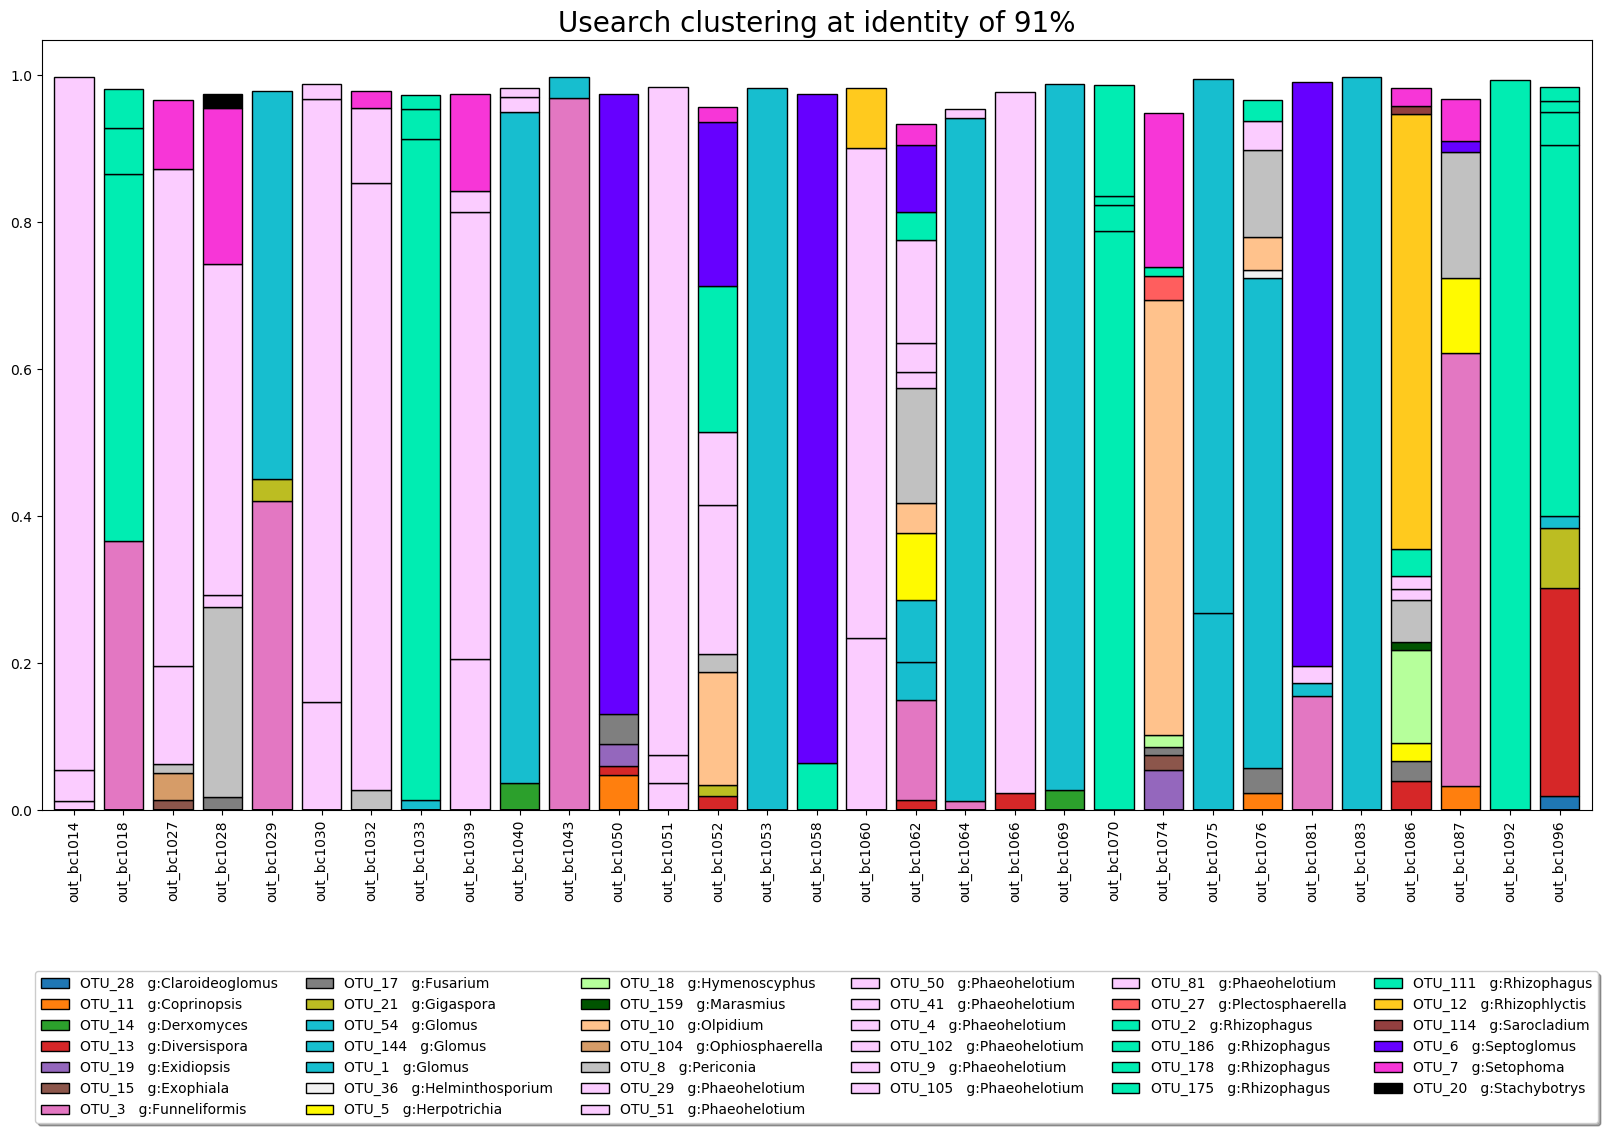

In [254]:
convert_per_plot(names[0], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 35.23%
# of unique genus: 25
# of OTUs: 46
Range of total OTUs % after cutoff: 93% to 100%


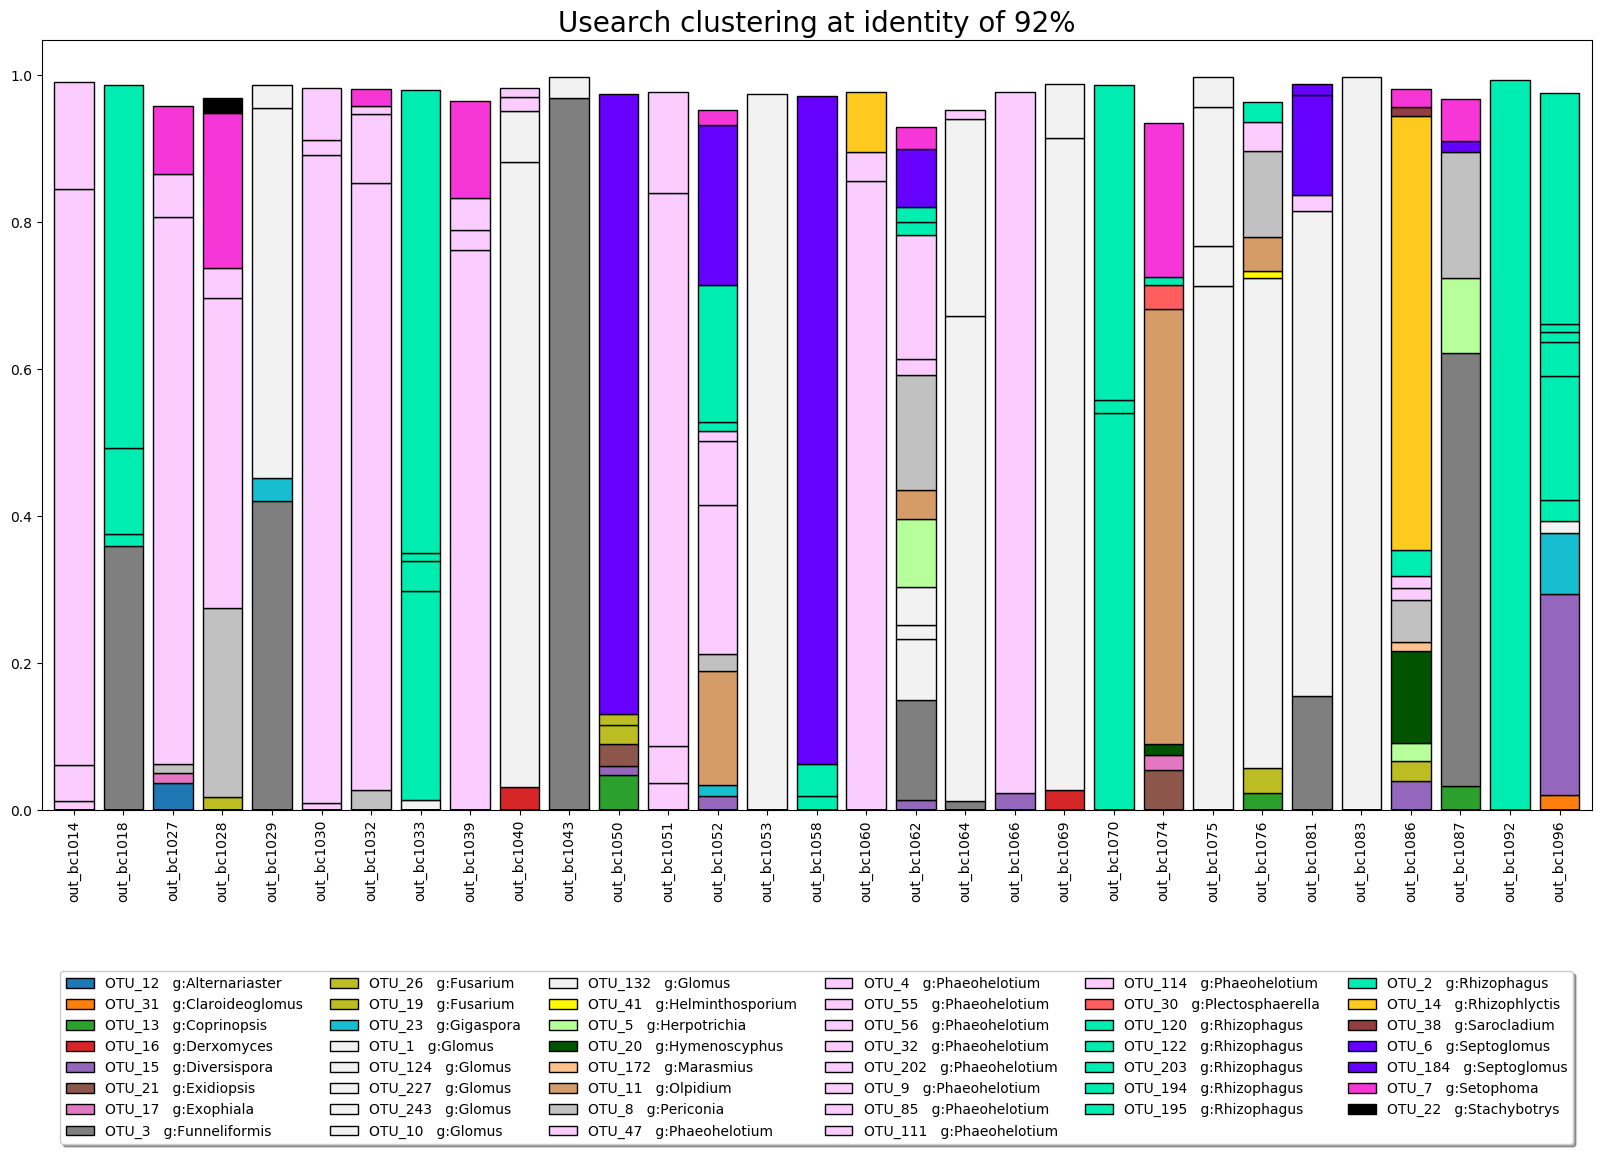

In [255]:
convert_per_plot(names[1], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 35.23%
# of unique genus: 25
# of OTUs: 46
Range of total OTUs % after cutoff: 92% to 100%


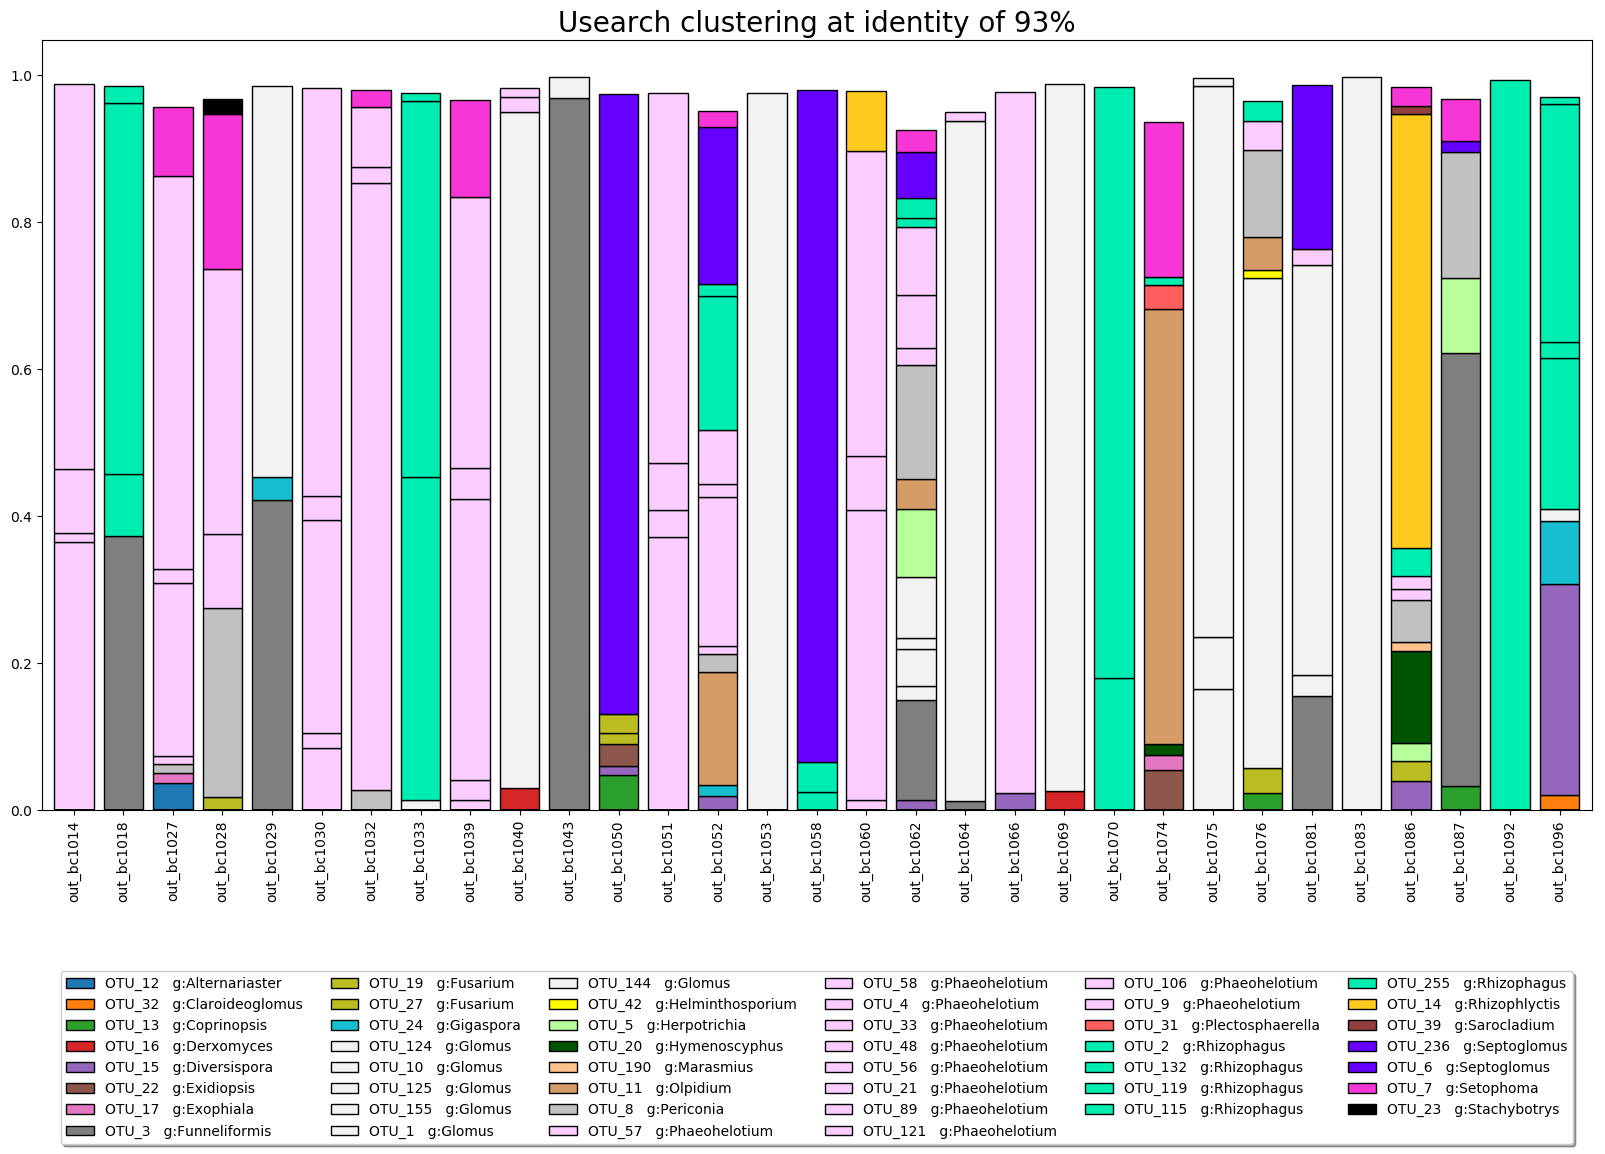

In [256]:
convert_per_plot(names[2], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 35.23%
# of unique genus: 25
# of OTUs: 53
Range of total OTUs % after cutoff: 91% to 100%


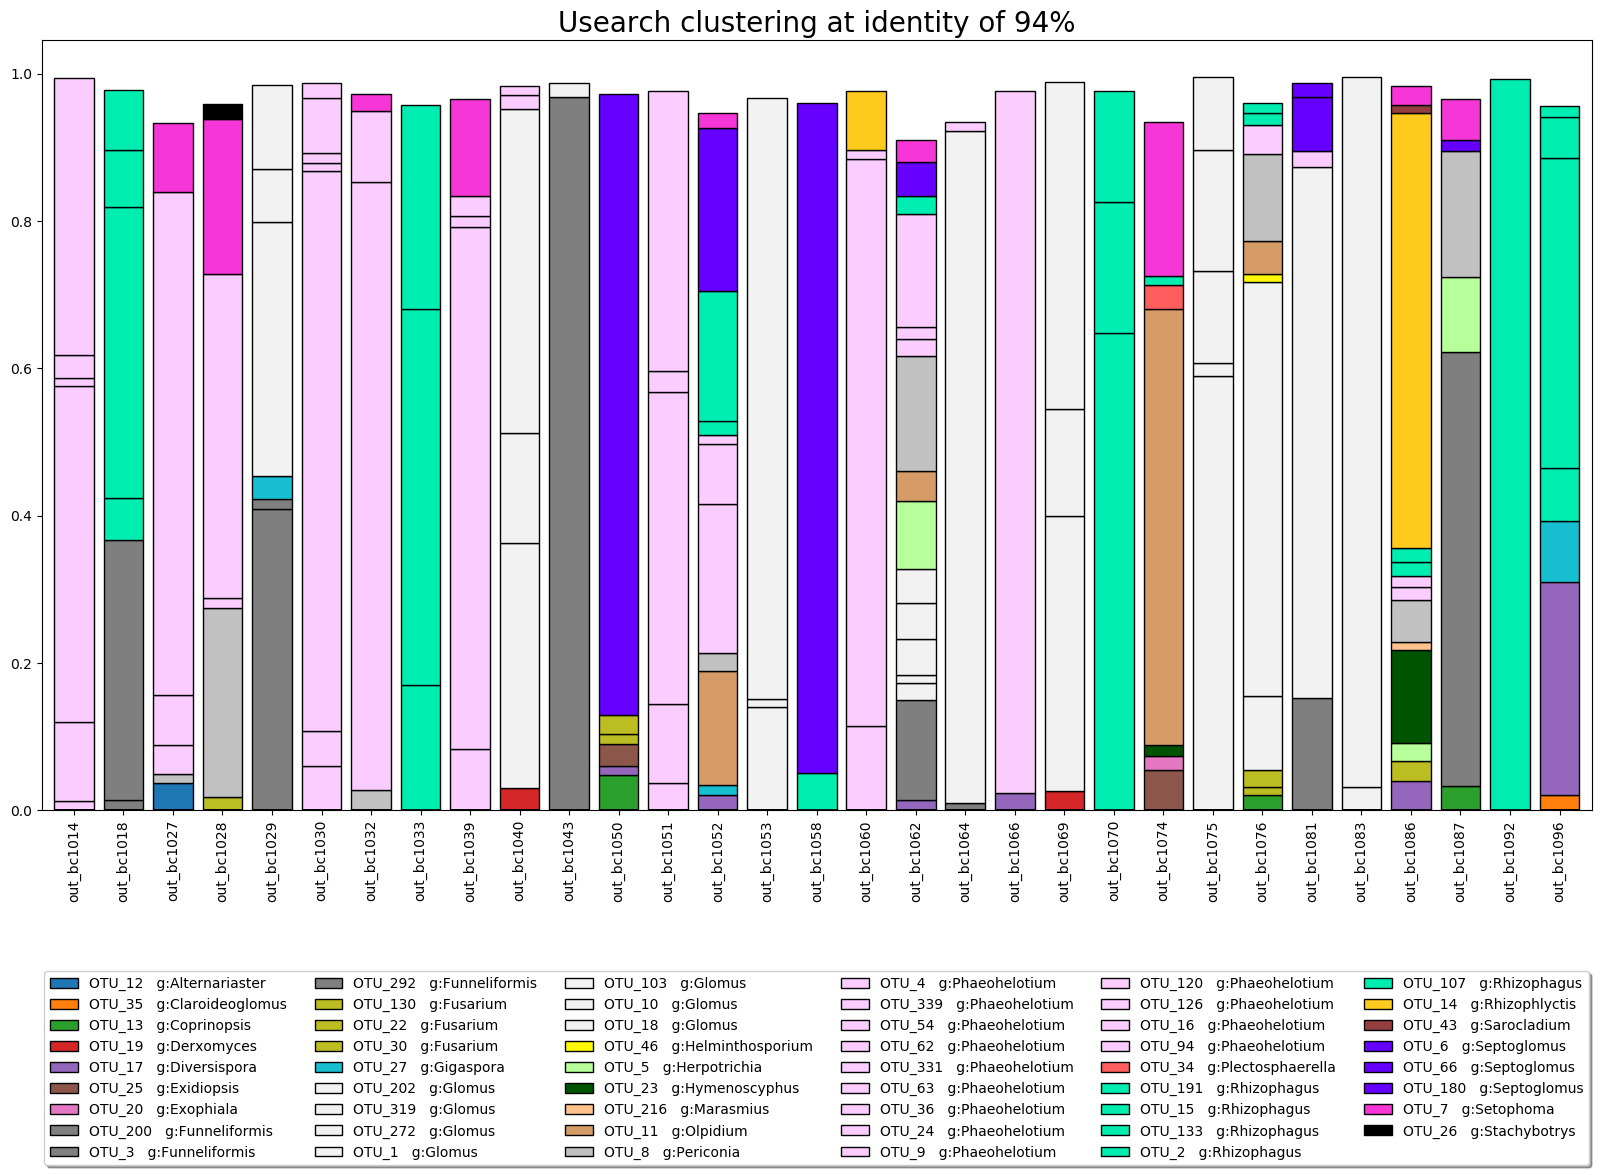

In [257]:
convert_per_plot(names[3], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 35.23%
# of unique genus: 25
# of OTUs: 63
Range of total OTUs % after cutoff: 87% to 100%


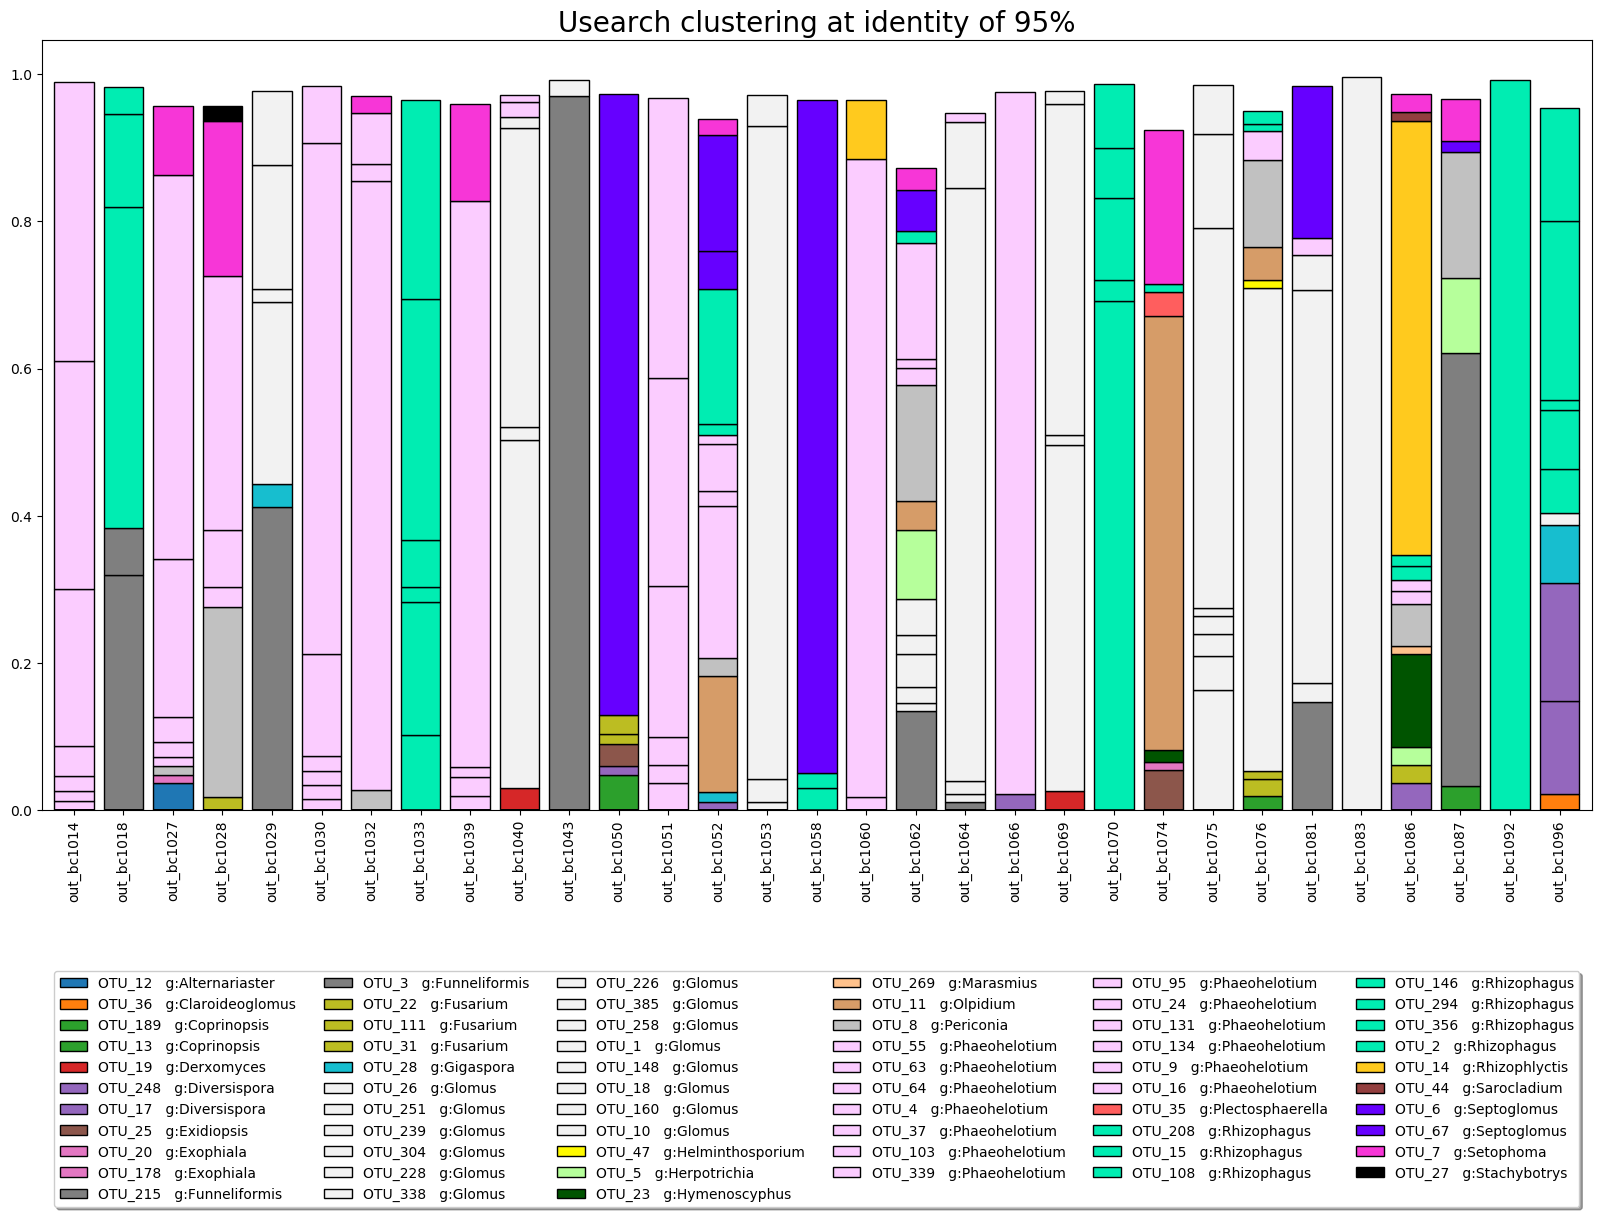

In [258]:
convert_per_plot(names[4], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 35.23%
# of unique genus: 25
# of OTUs: 61
Range of total OTUs % after cutoff: 90% to 100%


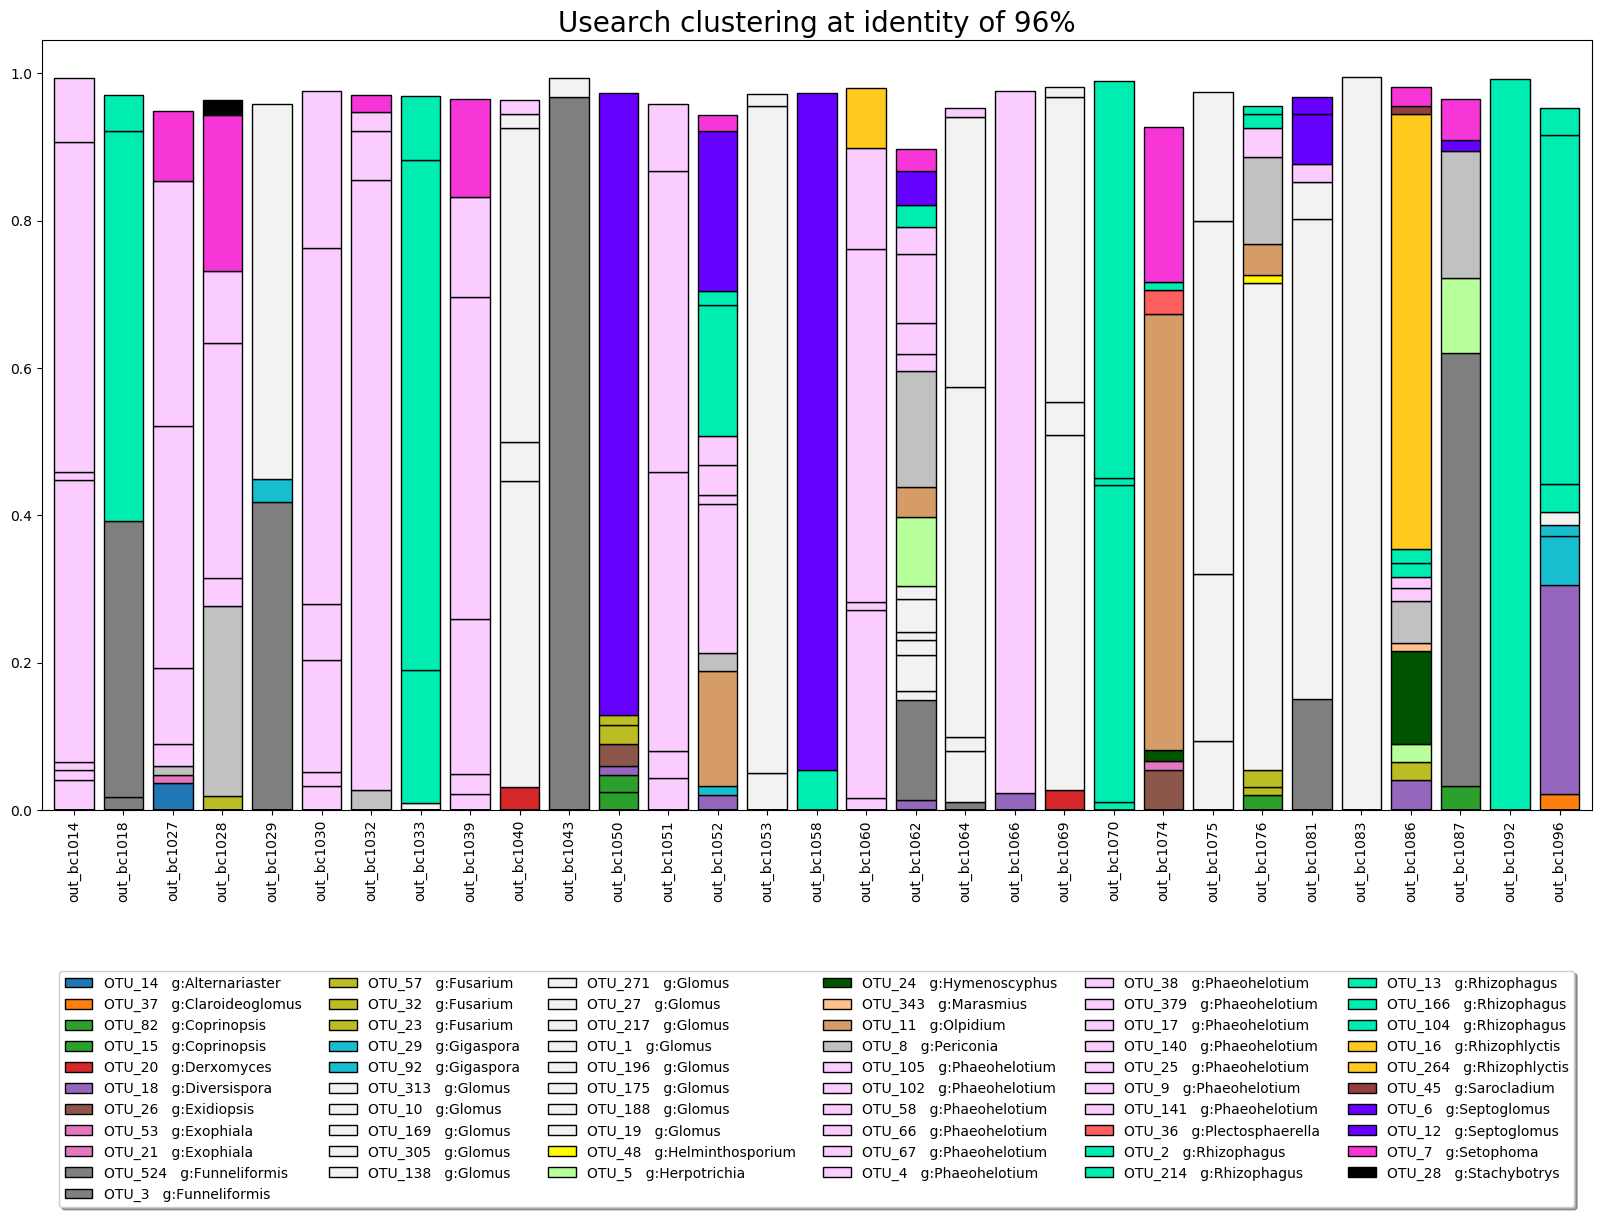

In [259]:
convert_per_plot(names[5], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 35.23%
# of unique genus: 25
# of OTUs: 71
Range of total OTUs % after cutoff: 84% to 99%


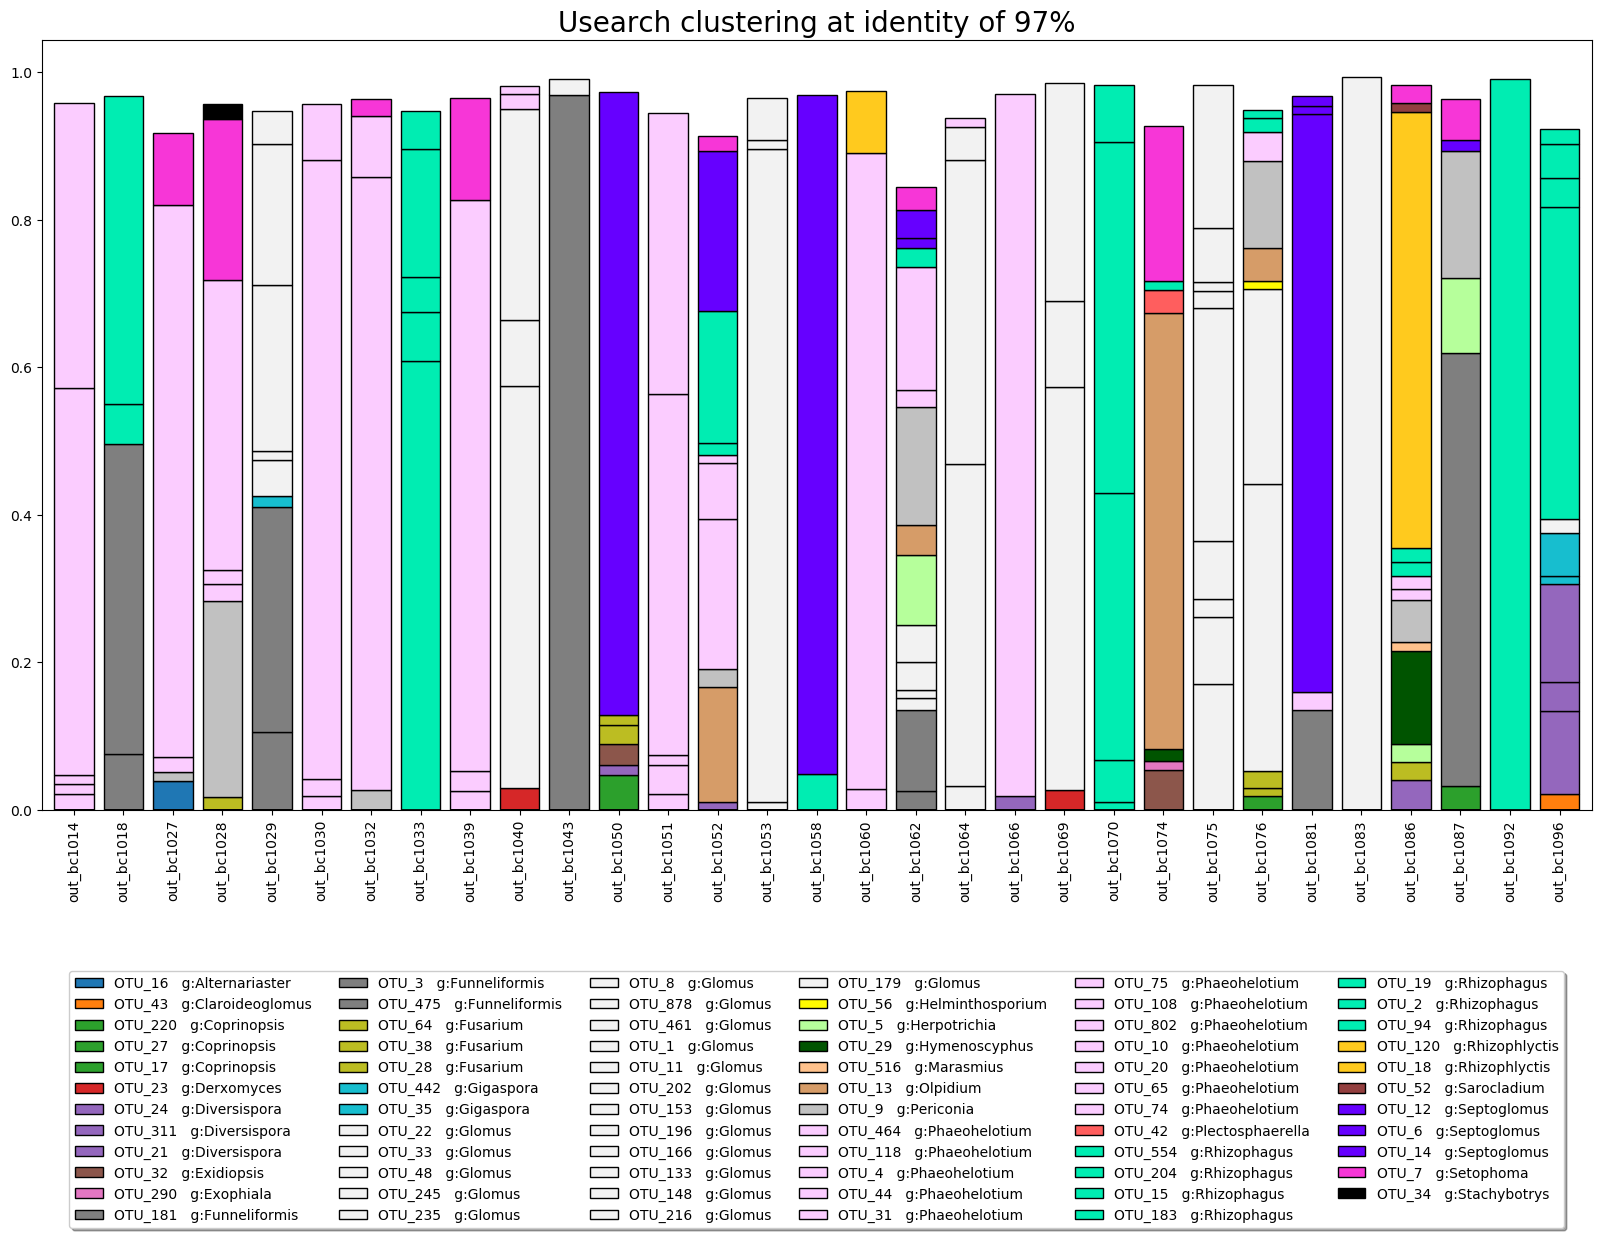

In [253]:
convert_per_plot(names[6], cut_off_per, cut_off_abund)

% of samples > 500 seqs: 34.48%
# of unique genus: 27
# of OTUs: 84
Range of total OTUs % after cutoff: 83% to 99%


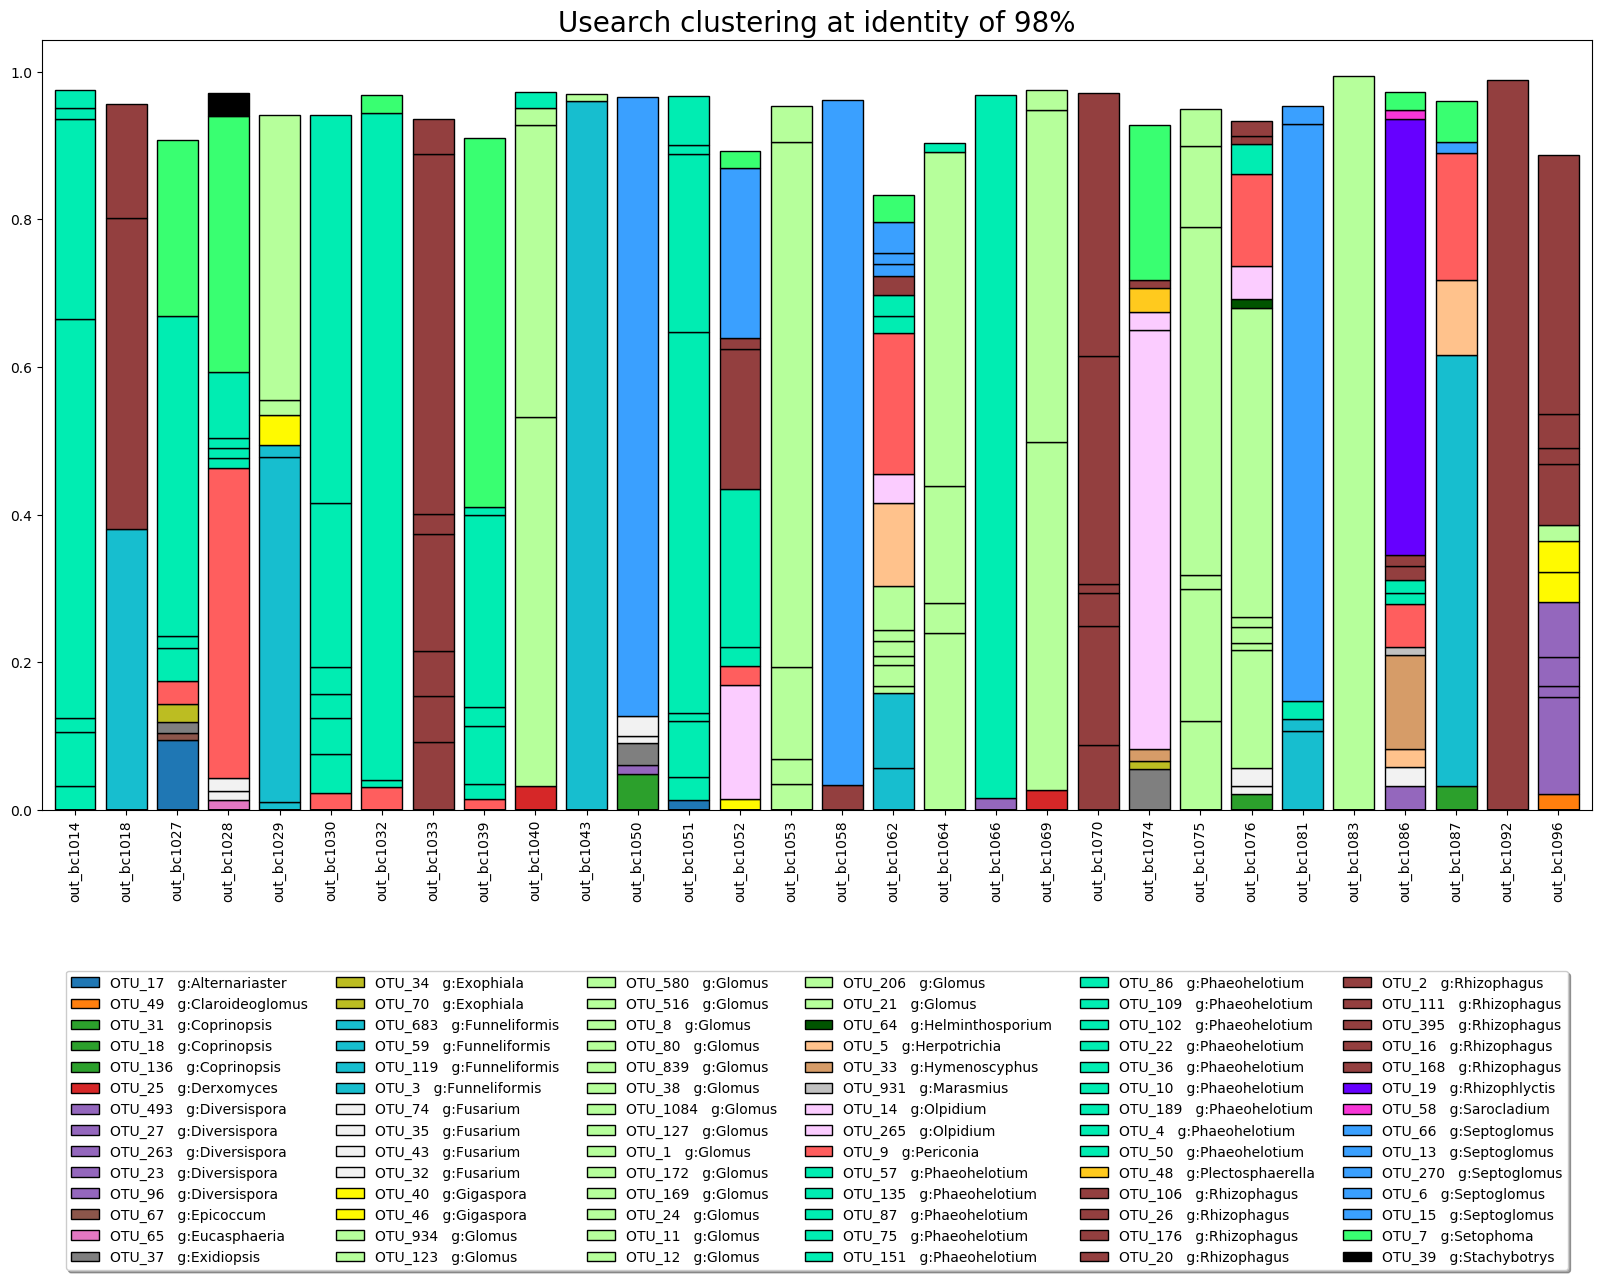

In [271]:
convert_per_plot(names[7], cut_off_per, cut_off_abund)

## Rarefaction Curve

In [361]:
pwd = 'all_re_filtered_lensort_OTU_id97.uc'
## 191578.0 total number of sequences when using all
def convert_to_pivot_tax(pwd,n):
    ## convert the usearch result to pivot table
    df = pd.read_csv(pwd,header=None,sep="\t")
    df1 = df[df[0]=="H"]
    df1 = df1.sample(n)
    df1[10] = df1[8].str.split("-",expand=True)[0]
    df2 = df1.pivot_table(index=9,columns=10,values=8,aggfunc='count')
    df2.index.name = "#OTU_ID"
    df2.columns.name = ""

    ## read 1st tax file
    pwd_tax_1 = pwd.replace(".uc","_sintax_rm.txt")
    tax_tem_1 = tax_genus(pwd_tax_1)#.info()#.head()
    merged_1 = pd.merge(df2,tax_tem_1,left_index=True,right_index=True,how="left")
    ## read 2nd tax file
    pwd_tax_2 = pwd.replace(".uc","_sintax_rm_unidentifiedG.txt")
    tax_tem_2 = tax_genus(pwd_tax_2)#.info()#.head()
    merged_2 = pd.merge(merged_1,tax_tem_2,left_index=True,right_index=True,how="left")

    ## rename columns
    col = list(merged_2.columns)
    col[-2:] = ['taxon_unite','taxon_unite_rmUg']
    merged_2.columns = col
    total_sequences_samples = merged_2.iloc[:,:-2].sum()
    toatl_num_OTUs = (merged_2 > 0).astype(int).iloc[:,:-2].sum()
    return pd.DataFrame(total_sequences_samples,columns=[n]), pd.DataFrame(toatl_num_OTUs,columns=[n])
    #return merged_2.iloc[:,:-2].sum().sum()

df1, df2 = convert_to_pivot_tax(pwd,100)
linspace = np.linspace(200,191578,100)
linspace = linspace.astype(int)
for n in linspace:
    tem1, tem2 = convert_to_pivot_tax(pwd,n)
    df1 = pd.merge(df1,tem1,left_index=True,right_index=True,how="outer")
    df2 = pd.merge(df2,tem2,left_index=True,right_index=True,how="outer")

In [362]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [363]:
idx_500 = df1[df1[191578] > 500].index
df1_500 = df1.loc[idx_500]
df2_500 = df2.loc[idx_500]

Text(0.5, 0, 'Sample Size')

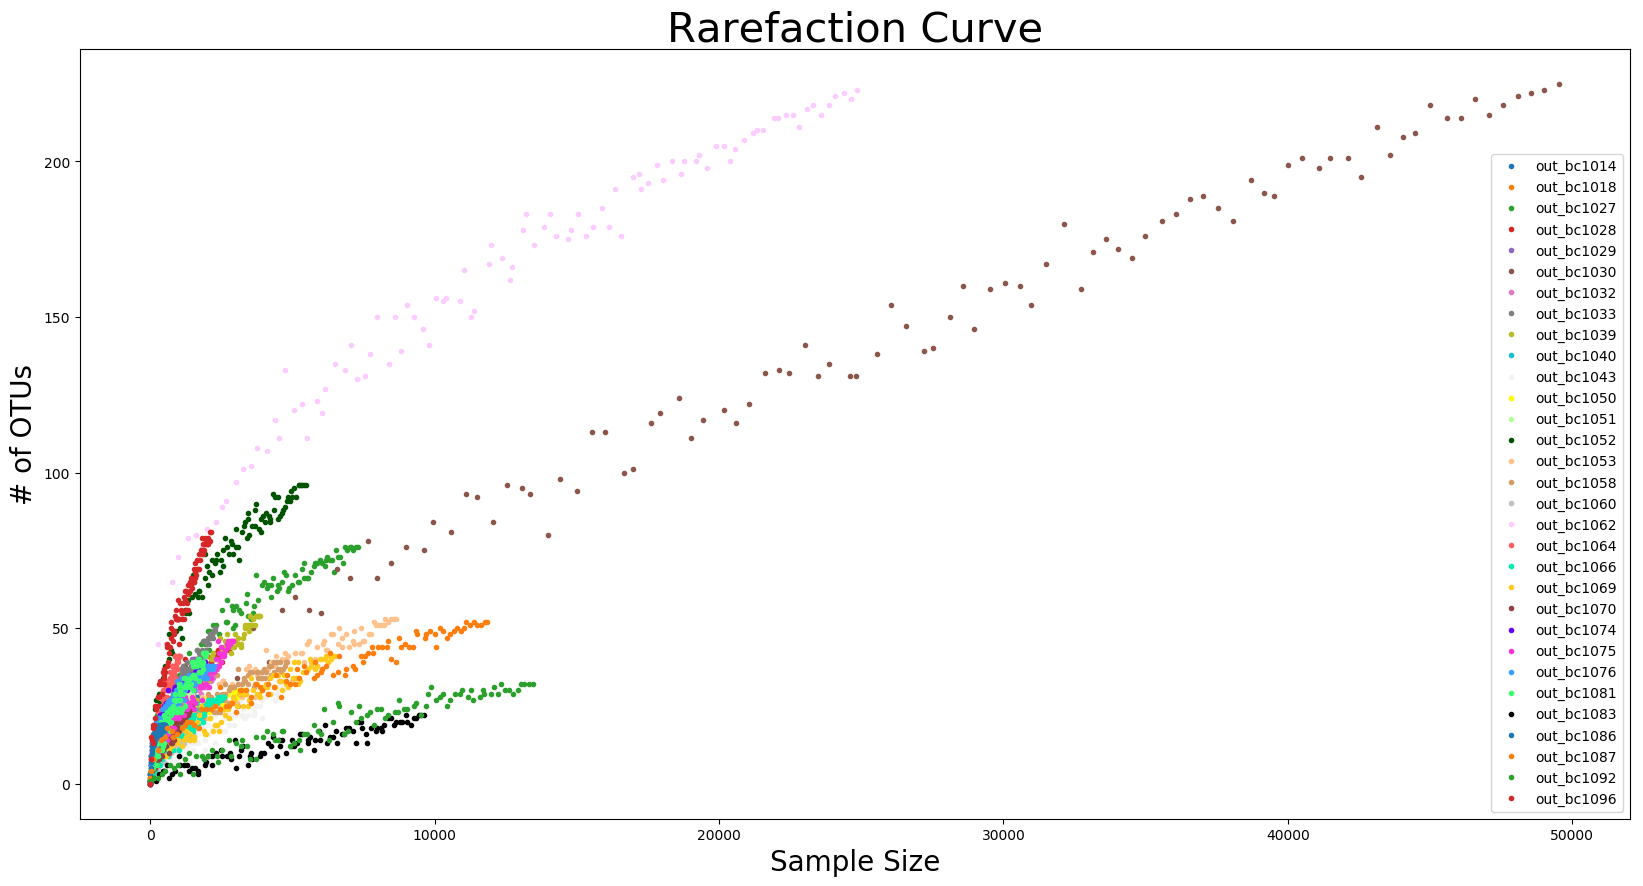

In [453]:
plt.figure(figsize=(20,10))

for i,color in zip(idx_500,my_colors*2):
    tem_sam1 = df1_500.loc[i]
    tem_sam2 = df2_500.loc[i]

    plt.plot(tem_sam1,tem_sam2,'.',color=color,label=i)
plt.legend()
plt.title("Rarefaction Curve", fontsize=30)
plt.ylabel("# of OTUs", fontsize=20)
plt.xlabel("Sample Size",  fontsize=20)

Text(0.5, 0, 'Sample Size')

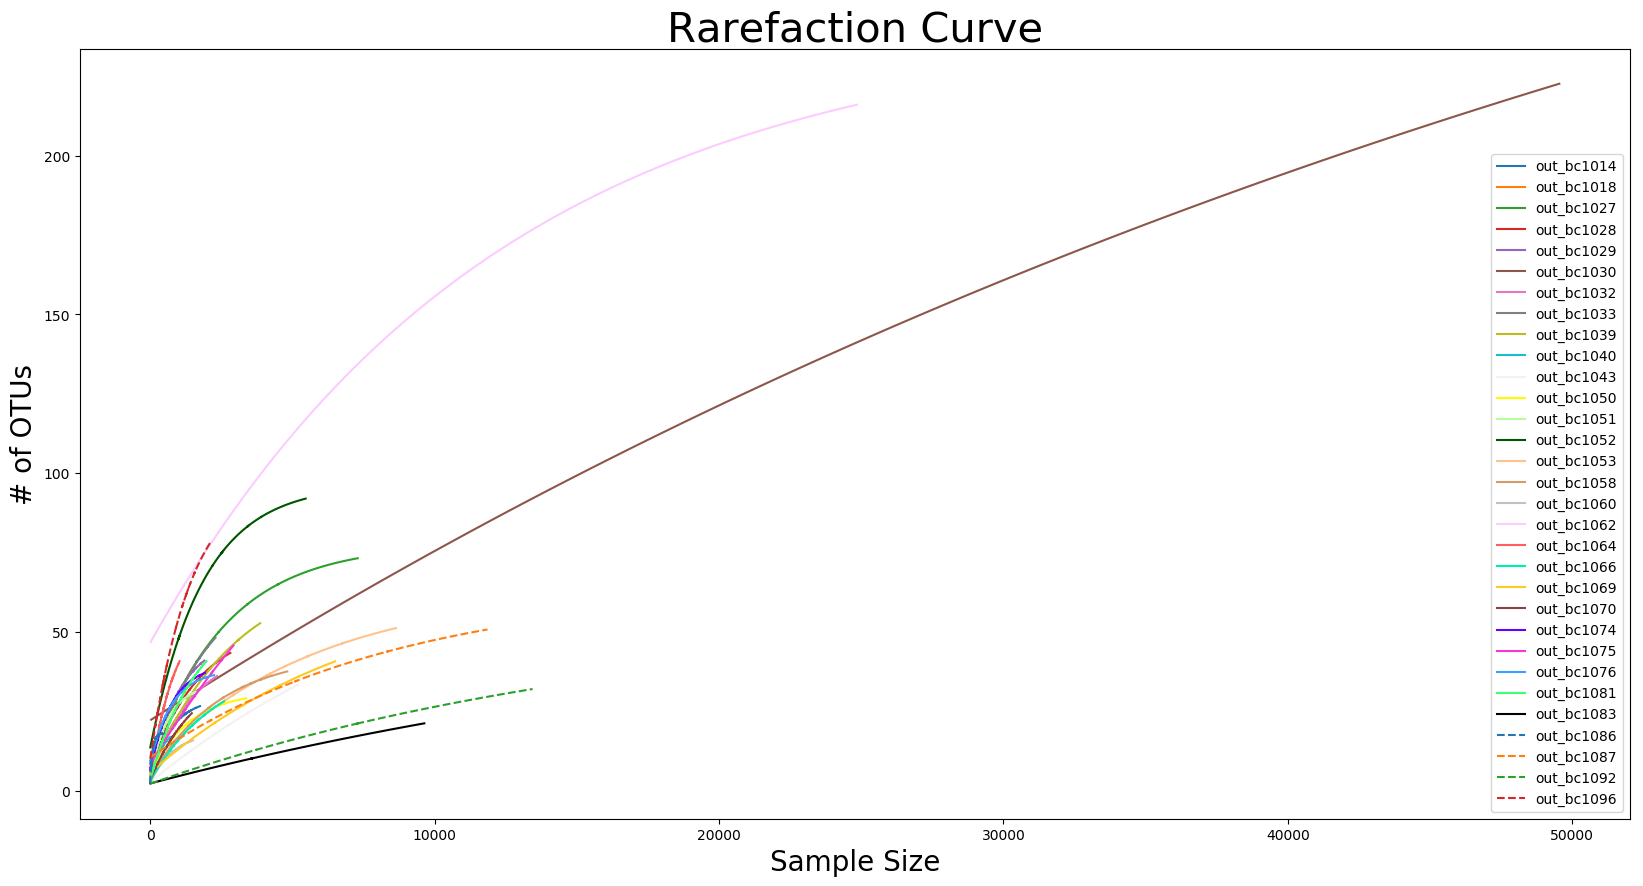

In [452]:
plt.figure(figsize=(20,10))
from scipy.optimize import curve_fit
def func(x, a, b, c,d):
    return a * (-b ** x) + c

def hex_to_rgb(hex):
    hex = hex.lstrip('#')
    hlen = len(hex)
    return tuple(int(hex[i:i+hlen/3], 16) for i in range(0, hlen, hlen/3))

n = 0
for i,color in zip(idx_500,my_colors*2):
    tem_sam1 = df1_500.loc[i]
    tem_sam2 = df2_500.loc[i]

    # Fitting
    popt, pcov = curve_fit(func, tem_sam1, tem_sam2)

    if n < len(my_colors):
        plt.plot(tem_sam1, func(tem_sam1, *popt),color=color,label=i)
    else:
        plt.plot(tem_sam1, func(tem_sam1, *popt),'--',color=color,label=i)
    n+=1

plt.legend()
    #i = i +1
    #plt.plot(tem_sam1,tem_sam2,'.',label=idxs[0])
plt.title("Rarefaction Curve", fontsize=30)
plt.ylabel("# of OTUs", fontsize=20)
plt.xlabel("Sample Size",  fontsize=20)

In [443]:
n

31